# Tutorial 4: Confidence Intervals via Bootstrapping

#### Lecture and Tutorial Learning Goals:
From this section, students are expected to be able to:

1. Define what a confidence interval is, and why we want to generate one.
2. Explain how the bootstrap sampling distribution can be used to create confidence intervals.
3. Write a computer script to calculate confidence intervals for a population parameter using bootstrapping.
4. Effectively visualize point estimates and confidence intervals.
5. Interpret and explain results from confidence intervals.
6. Discuss the potential limitations of these methods.

In [1]:
# Run this cell before continuing.
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
source("tests_tutorial_04.R")


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Warning message:
“package ‘infer’ was built under R version 4.0.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::

## 1. Steam Games

For the first part of this tutorial, we'll be working with a dataset that contains various attributes, including the name, original price, genre, and description, of over 40,000 different games available on Steam. Steam is a platform where video games (and some other types of applications) are distributed digitally. Essentially, Steam acts as a digital game store and library. Although this particular dataset was compiled in 2019, for this tutorial, we will assume we have data for the entire population for simplicity.


<img src="https://steamcdn-a.akamaihd.net/store/about/social-og.jpg" width=500>
<div style="text-align: center"><i>Image from <a href="https://store.steampowered.com/about/">store.steampowered.com</i></a></div><br>

This data set, like several of the others we have worked with so far, is included in the `datateachr` package under the object name `steam_games`. The original source of the data set can be found in the documentation (`?steam_games`). We are interested in calculating a **90% confidence interval** for the **median of the `original_price`** of the games in the population. Afterwards, we will interpret the confidence interval and, because we are lucky enough to have access to data for the entire finite population, we will calculate the true median and see whether it is captured by our confidence interval.

In [3]:
?steam_games

**Question 1.0** 
<br> {points: 1}

Filter out all `NA` values from the variable we are interested in (`original_price`), and select only that column.

**Note:** the values of `original_price` are in $USD.

_Assign your data frame to an object called `steam_pop`._

In [6]:
# your code here
steam_pop <- steam_games %>% filter(!is.na(original_price)) %>% select(original_price)
head(steam_pop)

original_price
<dbl>
19.99
29.99
39.99
44.99
0.00
59.99


In [7]:
test_1.0()

[1] "Success!"


**Question 1.1** 
<br> {points: 1}

Take a single random sample of size 40 from `steam_pop` using `rep_sample_n` and a seed of 2078. After taking the sample, ensure that only the `original_price` column is selected. (_Hint: you will need to ungroup before selecting the column_.)

_Assign your data frame to an object called `steam_sample`._

In [9]:
set.seed(2078)

# your code here
steam_sample <- steam_pop %>% 
    rep_sample_n(size = 40) %>%
    ungroup() %>%
    select(original_price)
head(steam_sample)

original_price
<dbl>
8.99
19.99
9.99
203.95
19.99
4.99


In [10]:
test_1.1()

[1] "Success!"


**Question 1.2** 
<br> {points: 1}

Take 1500 bootstrap samples from `steam_sample` using `rep_sample_n` and a seed of 9844. Then, calculate the median of each sample (name this column `bootstrap_median`). Your final data frame should have a `replicate` column and a `bootstrap_median` column.

_Assign your data frame to an object called `steam_bootstrapped`._

In [12]:
set.seed(9844)

# your code here
steam_bootstrapped <- steam_sample %>% 
    rep_sample_n(size=40, reps= 1500, replace=TRUE) %>%
    group_by(replicate) %>%
    summarise(bootstrap_median= median(original_price))
    
    

head(steam_bootstrapped)

`summarise()` ungrouping output (override with `.groups` argument)



replicate,bootstrap_median
<int>,<dbl>
1,13.49
2,4.99
3,4.99
4,8.99
5,4.99
6,9.99


In [13]:
test_1.2()

[1] "Success!"


**Question 1.3** 
<br> {points: 1}

Use the `summarize` and `quantile` functions to calculate a 90% confidence interval for the median. Use the 0.05th and 0.95th quantiles for the lower and upper bounds of the interval, respectively. Name the column containing the lower bound of the interval `ci_lower` and the upper bound `ci_upper`.

_Assign your data frame to an object called `steam_ci`._

In [21]:
# your code here
steam_ci <- steam_bootstrapped %>% select(bootstrap_median) %>%
    summarize(ci_lower = quantile(bootstrap_median, 0.05), ci_upper=quantile(bootstrap_median,0.95))
head(steam_ci)

ci_lower,ci_upper
<dbl>,<dbl>
4.99,12.49


In [22]:
test_1.3()

[1] "Success!"


### The `infer` package workflow for bootstrapping (and calculating confidence intervals)

As you may have seen in [ModernDive](https://moderndive.com/8-confidence-intervals.html#infer-workflow), there is an alternative workflow for generating bootstrap distributions and calculating confidence intervals. The benefits are outlined in [Section 8.4.2](https://moderndive.com/8-confidence-intervals.html#infer-workflow). However, to summarize, the main benefit is that it will allow us to use similar code for inference methods that we will learn about later on, so we can compare and transition from one method to another much easier. The general workflow for bootstrapping with the `infer` workflow is summarized in the chart below:

<img src="https://d33wubrfki0l68.cloudfront.net/e7a0c87bc2cf1c53724bff5b58ff74e80224aac2/7e5fe/images/flowcharts/infer/calculate.png
" width=400>
<div style="text-align: center"><i>Image from <a href="https://moderndive.com/8-confidence-intervals.html#infer-workflow">ModernDive</i></a></div><br>

Given a sample, in the `specify` step, you "specify" the variable in the sample that you are interested in. With `generate`, you "generate" the bootstrap samples (like using `rep_sample_n`). Then, with `calculate`, you "calculate" the statistic you are interested in for each re-sample (like using `group_by(replicate)` and then `summarize`).

Finally, you can use `get_confidence_interval` to calculate a confidence interval using our bootstrap distribution and quantiles (like using the `summarize` and `quantile` functions).

Let's re-do **question 1.2** and **question 1.3** using this new workflow for practice.

**Question 1.2 (with the `infer` workflow!)** 
<br> {points: 1}

Using the `infer` workflow, take 1500 bootstrap samples from `steam_sample` and calculate the **median** of each sample. Use the same seed as you did previously (9844) and the scaffolding provided below as a guide:

```r
steam_bootstrapped2 <- ... %>% 
    specify(response = ...) %>% 
    generate(type = "bootstrap", reps = ...) %>% 
    calculate(stat = "...")
```

_Assign your data frame to an object called `steam_bootstrapped2`._

In [88]:
set.seed(9844) # DO NOT CHANGE

# your code here
steam_bootstrapped2 <- steam_sample %>% 
    specify(response = original_price) %>% 
    generate(type = "bootstrap", reps = 1500) %>% 
    calculate(stat = "median")
head(steam_bootstrapped2)

replicate,stat
<int>,<dbl>
1,13.49
2,4.99
3,4.99
4,8.99
5,4.99
6,9.99


In [73]:
test_1.2_infer()

[1] "Success!"


**Question 1.3 (with the `infer` workflow)** 
<br> {points: 1}

Use the `get_confidence_interval` function with the bootstrap distribution you just generated (`steam_bootstrapped2`) to calculate a 90% confidence interval for the median. Use the scaffolding provided below as a guide:

```r
steam_ci2 <- steam_bootstrapped2 %>% 
    get_confidence_interval(level = ..., type = "percentile")

```

**Note:** you can also use the function `get_ci`, which is the same as the function `get_confidence_interval`, but it is much more concise. Try replacing `get_confidence_interval` with `get_ci`, and the result will be the same!

_Assign your data frame to an object called `steam_ci2`._

In [74]:
# your code here
steam_ci2 <- steam_bootstrapped2 %>% 
    get_confidence_interval(level = 0.9, type = "percentile")

steam_ci2

lower_ci,upper_ci
<dbl>,<dbl>
4.99,12.49


In [75]:
test_1.3_infer()

[1] "Success!"


**Question 1.4**
<br> {points: 1}

Visualize the confidence interval (`steam_ci2`) with two `geom_vline` layers on top of the bootstrap distribution (`steam_bootstrapped2`) using `geom_histogram` with bin widths of 5. Use the scaffolding provided below as a guide:

```r
steam_ci_plot <- steam_bootstrapped2 %>% 
    ggplot(aes(x = ...)) +
    ...(binwidth = ...) +
    ...(xintercept = steam_ci[[1]]) +
    ...(xintercept = ...)
```

_Assign your plot to an object called `steam_ci_plot`._

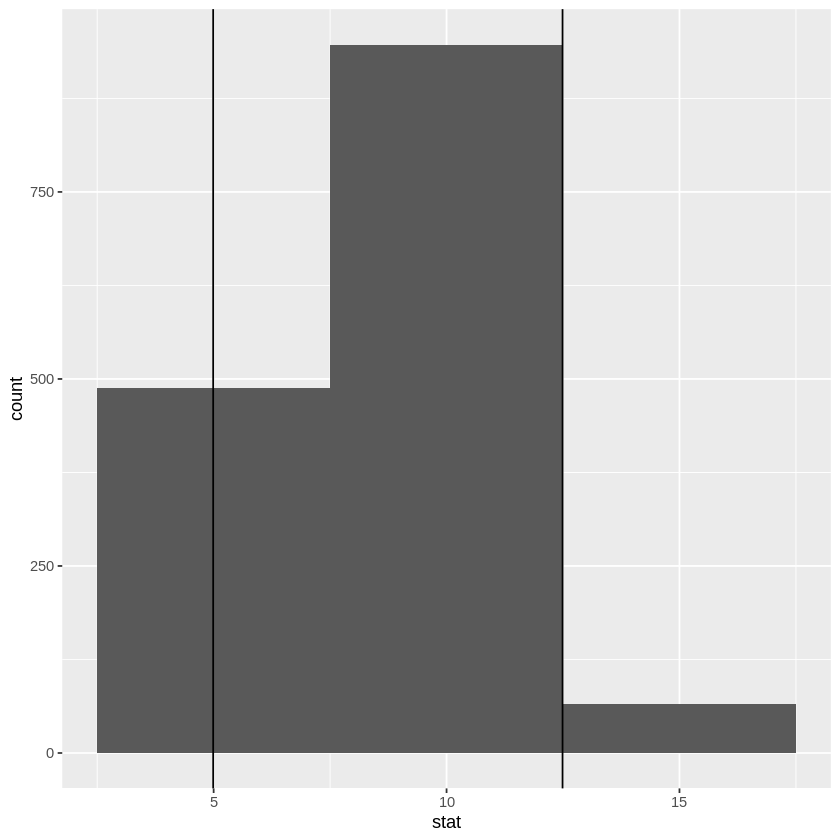

In [76]:
# your code here
steam_ci_plot <- steam_bootstrapped2 %>% 
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 5) +
    geom_vline(xintercept = steam_ci[[1]]) +
    geom_vline(xintercept = steam_ci[[2]])
steam_ci_plot


In [89]:
test_1.4()

[1] "Success!"


**Question 1.5** 
<br> {points: 3}

Consider the effectiveness of the plot above. If you think the plot is effective, list **at least** three reasons why. Otherwise, list **at least** three things that you would change about the plot to make it more effective.

The plot is ineffective. I would change the following:
- reduce the bin width to give a better visual perception of how the spread of the data is
- Put a more readable label on the x axis
- add a more readable title to the plot

**Question 1.6** 
<br> {points: 1}

Calculate the median of the population `steam_pop`.

_Assign your answer to an object called `steam_median`. Your answer should be a single number._

In [90]:
# your code here
steam_median = median(steam_pop$original_price)
steam_median

[1] 4.99

In [91]:
test_1.6()

[1] "Success!"


**Question 1.7**
<br>{points: 1}

True or false?

The confidence interval `steam_ci` captures the parameter of interest.

_Assign your answer to an object called `answer1.7`. Your answer should be either "true" or "false", surrounded by quotes._

In [92]:
# answer1.7 <- ...

# your code here
answer1.7 <- "true"

In [93]:
test_1.7()

[1] "Success!"


**Question 1.8**
<br>{points: 1}

Suppose you repeated the process above and took 100 more samples and calculated a 90% cofidence interval for each sample. How many of the 100 intervals would you expect to capture the true median of the population?

_Assign your answer to an object called `answer1.8`. Your answer should be a single integer._

In [94]:
# answer1.8 <- ...

# your code here
answer1.8 <- 90

In [95]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer1.8"', {
  expect_true(exists("answer1.8"))
})
answer_as_numeric <- as.numeric(answer1.8)
test_that("Solution should be a number", {
  expect_false(is.na(answer_as_numeric))
})
test_that("Solution should be an integer", {
  expect_true(answer_as_numeric %% 1 == 0)
})

## 2. Breast Cancer Diagnosis

In this section, we'll be working with a sample of characteristics of the cell nuclei of various breast masses. The data originates from University of Wisconsin Hospital, where a physician named Dr. William H. Wolberg obtained samples of breast lumps (or tumors) using a fine needle aspiration (FNA) biopsy. Images of the samples were digitized to compute the characteristics of the nuclei that you can find in the sample to work towards Dr. Wolberg's original goal of diagnosing new tumours mathematically using only a single FNA [(he was quite successful!)](https://www.pnas.org/content/87/23/9193.short). In the sample, the nuclei characteristics have been paired with the ultimate diagnosis of the mass (benign or malignant).

<img src="http://pages.cs.wisc.edu/~street/saves/xcyt1.gif
" width=500>
<div style="text-align: center">A screenshot from Xcyt, a program that was developed by Dr. Wolberg for breast mass diagnoses using these data.<br><i>Image from <a href="https://moderndive.com/8-confidence-intervals.html#infer-workflow">pages.cs.wisc.edu</i></a></div><br>

This sample is located in the `datateachr` package, and is named `cancer_sample`. We are  interested in estimating the **proportion of the patients from the population whose breast masses are malignant** (`diagnosis == "M"`).

In [96]:
# Run this cell before continuing.
head(cancer_sample)

ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


**Question 2.0**
<br>{points: 3}

Describe the population from which the sample `cancer_sample` was drawn from.

**Note:** this question has a fairly wide range of acceptable answers!

The population from which cancer_sample was drawn is the population of patients' breasts lumps. 

**Question 2.1**
<br>{points: 3}

Use the `infer` package workflow to calculate an 80% confidence interval for the proportion with malignant breast masses (`diagnosis == "M"`), using bootstrapping with 1000 replicates. Set your seed to 8943. Your final dataframe should have a single row and two columns named `lower_ci` and `upper_ci`.

**Hint:** If you're stuck, don't be afraid to explore the [documentation for the `infer` package](https://cran.r-project.org/web/packages/infer/infer.pdf), peek at [Section 8.5 of ModernDive](https://moderndive.com/8-confidence-intervals.html#one-prop-ci), or ask someone for help! You can use your code from the previous section as a blueprint.

_Assign your data frame to an object called `cancer_ci`._

In [100]:
set.seed(8943) # DO NOT CHANGE!

# your code here
cancer_ci <- cancer_sample %>%
    filter(diagnosis=="M") %>%
    #select(diagnosis) %>%
    specify(response = diagnosis) %>% 
    generate(type = "simulate", reps = 1000) %>% 
    calculate(stat = "prop")
   # get_confidence_interval(level = 0.8, type = "percentile")
   # generate(type = "bootstrap", reps = 1500) %>% 
   # calculate(stat = "median")
cancer_ci

ERROR: Error: To calculate a proportion, the `"success"` argument must be provided in `specify()`.


In [87]:
test_2.1()

ERROR: Error: Test failed: 'Data frame does not contain the correct data'
* digest(as.integer(cancer_ci$lower_ci * 1e+06)) not equal to "81d11d2d9c5edc8dde5943e7e8ccf428".
1/1 mismatches
x[1]: "c7f66da1cae4f223b9bae717f05900f7"
y[1]: "81d11d2d9c5edc8dde5943e7e8ccf428"
* digest(as.integer(cancer_ci$upper_ci * 1e+06)) not equal to "f79b45b4d0457d5c267b08e74659f678".
1/1 mismatches
x[1]: "c7f66da1cae4f223b9bae717f05900f7"
y[1]: "f79b45b4d0457d5c267b08e74659f678"


**Question 2.2**
<br>{points: 3}

Does the confidence interval capture the population parameter we are interested in? If there is no way to determine this for certain, explain why that is the case.

DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.

**Question 2.3**
<br>{points: 3}

In 1-2 sentences, explain one way you can interpret the confidence interval you calculated above (`cancer_ci`).

DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.

**Question 2.4**
<br>{points: 1}

Suppose you calculated another 80% confidence interval for the population proportion, but with a sample that was 5 times larger than `cancer_sample`. How would you expect this second interval compare to the first confidence interval you calculated above (`cancer_ci`)?

A. The second confidence interval would likely be narrower than the first.

B. The second confidence interval would likely be about the same width as the first.

C. The second confidence interval would likely be wider than the first.

D. There is no way to tell how the second interval would compare to the first.

_Assign your answer to an object called `answer2.4`. Your answer should be a single character surrounded by quotes._

In [ ]:
# answer2.4 <- ...

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer2.4"', {
  expect_true(exists("answer2.4"))
})
test_that('Solution should be a single character ("A", "B", "C", or "D")', {
  expect_match(answer2.4, "a|b|c|d", ignore.case = TRUE)
})

## 3. Bow River at Banff: 100-Year Flood

Sample quantiles, like the other statistics we have introduced such as the sample mean and standard deviation, can also be considered as a point estimate of a population parameter. Meaning, quantiles can be used to describe the distribution of a quantitative variable of a population; each distribution has a unique 0.4 quantile, 0.93 quantile, and so on. One common usage of quantiles is to estimate N-year floods. An N-year flood is defined as smallest possible severety for a flood that we **expect** to occur once every N years (but could occur more or less than once in any given N-year span). To calculate a point estimate N-year flood, one must find a quantile such that $\frac{1}{N}$ known observations fall above it. Also, like the other population parameters we have mentioned, we can also calculate a **confidence interval** for this parameter, which is what we will be doing in this section.


In 2013, a combination of factors lead to the Bow River reaching very high flow rates (466 ${\text{m}^3}/{\text{s}}$ near Banff), which contributed to extreme flooding throughout Alberta, the Canadian province that lies directly east of British Columbia. One photograph of the event is shown above. For many years the Government of Canada has been collecting hydrometric data at many different stations for several rivers, including the Bow River. So, what's the least severe flood due to high Bow River flow rates that Albertans can expect every 100 years? To answer this question, our goal is calculate a **95% confidence interval for the 100-year flood** (the $1 - \frac{1}{100} = 0.99$ quantile) using the **maxima** flow rate data collected at the Banff Bow River station, recorded in ${\text{m}^3}/{\text{s}}$. This data is located [here](https://wateroffice.ec.gc.ca/report/historical_e.html?stn=05BB001&dataType=Annual+Extremes&parameterType=Flow&year=2018&mode=Table) but we have already tidied the data for you and included it in the `datateachr` package under the name `flow_sample`.

`flow_sample` contains information about the maximum _and_ minimum flow rates for each year, so we need to filter the data set for **flow maxima**. We have done this for you in the cell below:

In [ ]:
# Run this cell before continuing.
flow_sample <- flow_sample %>% 
    filter(extreme_type == "maximum")

head(flow_sample)

**Question 3.0**
<br>{points: 3}

The data contained in `flow_sample` is considered a sample. Describe the population from which the sample was drawn from.

**Note:** there may more than one solution to this question depending on how one interprets "population".

DOUBLE CLICK TO EDIT **THIS CELL** AND REPLACE THIS TEXT WITH YOUR ANSWER.

**Question 3.1**
<br>{points: 3}

Use the `infer` package workflow to generate bootstrap distribution of the appropriate sample quantiles for `flow_sample` using 3000 bootstrap replicates. Set your seed to 4629. Your final dataframe should have the columns `replicate` and `stat`.

**IMPORTANT NOTE:** because the `calculate` function does not support using quantiles as the sample statistic, here we have to use the `summarize` function. Thus, in place of the line where you would usually use `calculate` with the `infer` package workflow, you can use the following line:

```r
    ... %>%
    summarize(stat = quantile(flow, probs = 0.99))
```

_Assign your data frame to an object called `flow_bootstrapped`._

In [ ]:
set.seed(4629) # DO NOT CHANGE!

# your code here
fail() # No Answer - remove if you provide an answer
head(flow_bootstrapped)

In [ ]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "flow_bootstrapped"', {
  expect_true(exists("flow_bootstrapped"))
})
test_that("Solution should be a data frame", {
  expect_true("data.frame" %in% class(flow_bootstrapped))
})

**Question 3.2**
<br>{points: 3}

Use the appropriate function from the `infer` package to calculate a 95% confidence interval for the 100-year flood from the bootstrap distribution you just generated. Your final dataframe should have a single row and two columns named `lower_ci` and `upper_ci`.

_Assign your data frame to an object called `flow_ci`._

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
head(flow_ci)

In [ ]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "flow_ci"', {
  expect_true(exists("flow_ci"))
})
test_that("Solution should be a data frame", {
  expect_true("data.frame" %in% class(flow_ci))
})

**Question 3.3**
<br> {points: 3}

Create an **effective** visualization of the confidence interval `flow_ci` and its associated bootstrap distribution `flow_bootstrapped`. Use whichever layers and arguments you wish. 

**Hint:** if you want some inspiration, check out https://www.r-graph-gallery.com/index.html!

_Assign your plot to an object called `flow_ci_plot`._

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
steam_ci_plot

_Use your plot above to help you answer the **next 3 questions**._

**Question 3.4**
<br>{points: 1}

True or false?

There is a 50% chance that the true 100-year flood value is captured by the confidence interval `flow_ci`.

_Assign your answer to an object called `answer3.4`. Your answer should be either "true" or "false", surrounded by quotes._

In [ ]:
# answer3.4 <- ...

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer3.4"', {
  expect_true(exists("answer3.4"))
})
test_that('Answer should be "true" or "false"', {
  expect_match(answer3.4, "true|false", ignore.case = TRUE)
})

**Question 3.5**
<br>{points: 1}

True or false?

We are 95% confident that the true 100-year flood value is captured by the confidence interval `flow_ci`.

_Assign your answer to an object called `answer3.5`. Your answer should be either "true" or "false", surrounded by quotes._

In [ ]:
# answer3.5 <- ...

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer3.5"', {
  expect_true(exists("answer3.5"))
})
test_that('Answer should be "true" or "false"', {
  expect_match(answer3.5, "true|false", ignore.case = TRUE)
})

**Question 3.6**
<br>{points: 1}

True or false?

If we increased the confidence level of the confidence interval `flow_ci`, we would expect that it would become narrower.

_Assign your answer to an object called `answer3.6`. Your answer should be either "true" or "false", surrounded by quotes._

In [ ]:
# answer3.6 <- ...

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
# Here we check to see if you have given your answer the correct object name
# and if your answer is plausible. However, all other tests have been hidden
# so you can practice deciding when you have the correct answer.
test_that('Did not assign answer to an object called "answer3.6"', {
  expect_true(exists("answer3.6"))
})
test_that('Answer should be "true" or "false"', {
  expect_match(answer3.6, "true|false", ignore.case = TRUE)
})